<a href="https://colab.research.google.com/github/Soumyadip54321/DataScience/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Explore example of pytorch end to end workflow.This workbook demonstrates the steps that highlights ML in pytorch.

In [2]:
what_were_covering={1:"data(prepare and load)",2:"build model",3:"fit model to data",4:"make predictions and evaluate model",5:"save & load model"
,6:"put it all together"}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fit model to data',
 4: 'make predictions and evaluate model',
 5: 'save & load model',
 6: 'put it all together'}

In [3]:
import torch
from torch import nn #contains all basic building blocks for ML models
import matplotlib.pyplot as plt

print(torch.__version__)

2.1.0+cu121


# DATA PREPARING AND LOADING
Data can be almost anything such as,
1. excel sheets
2. images
3. Videos
4. Audios
5. DNA
6. Text etc

ML contains:
1. Obtain data in the form of numerical representation
2. build model to learn patters in data

To showcase this let's create known data for linear regression.

In [5]:
import torch
x=torch.tensor([[[1,2,3],[4,5,6]]])
x.ndim

3

In [6]:
x.squeeze_()
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [9]:
torch.unsqueeze(x,dim=2)

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]]])

In [12]:
#create known parameters
weight=0.7
bias=0.3

start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weight*X+bias

len(X),len(Y),X,Y

(50,
 50,
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],


### Split Data Into Train And Test Sets
We create train and test data

In [13]:
#create train-test splits
train_split=int(0.8*len(X))
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

### VISUALIZE DATA AVAILABLE
We use **matplotlib** to visualise the data

In [14]:
def plot_prediction(train_data=X_train,train_labels=Y_train,test_data=X_test,test_labels=Y_test,predictions=None):
  plt.figure(figsize=(10,7))

  #plot train data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Train Data")

  #plot test data in red
  plt.scatter(test_data,test_labels,c="r",s=4,label="Test Data")

  if predictions is not None:
    #plot predictions if they exist
    plt.scatter(test_data,predictions,c="g",s=4,label="predictions")

  plt.legend(prop={"size":14})

TypeError: imshow() missing 1 required positional argument: 'X'

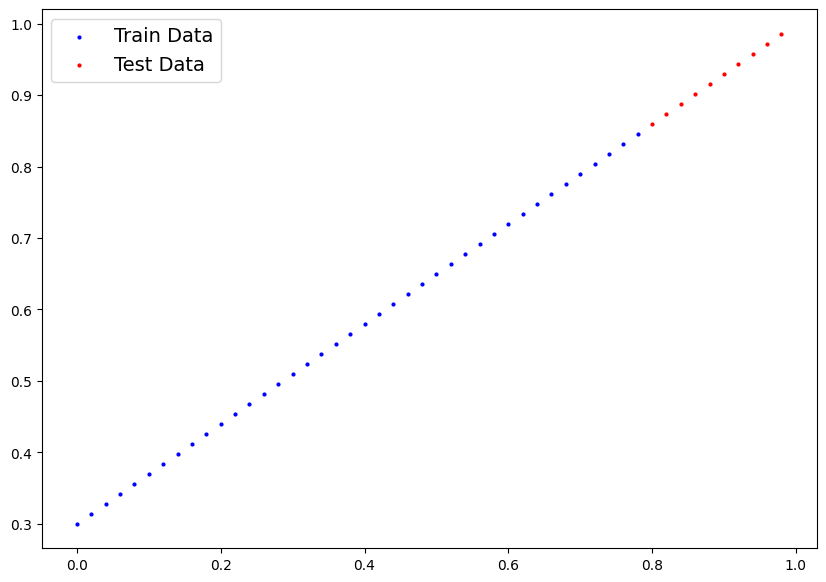

In [16]:
plot_prediction()

## BUILD MODEL

In [17]:
#create linear regression model

class linearregression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True))

  #defines computation of model
  def forward(self,x):
    return self.weights*x+self.bias

#### Pytorch Model Building Essentials
1. torch.nn.Parameter - what our model must try and learn
2. torch.nn.Module - Base class for all NN modules, one must overwrite forward method
3. torch.optim - This is where algorithms such as SGD,Adam etc which helps with gradient descent lives.


# CHECK CONTENTS OF OUR PYTORCH MODEL

In [18]:
#create a random seed
torch.manual_seed(42)

#create an instance of the model
model=linearregression()

#check the parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
#list named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## MAKE PREDICTION THROUGH OUR MODEL
We use **torch.inference_mode()** to see how well our model predicts labels corresponding to test data

In [20]:
#check model's predictive power
with torch.inference_mode():
  y_preds=model(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

TypeError: imshow() missing 1 required positional argument: 'X'

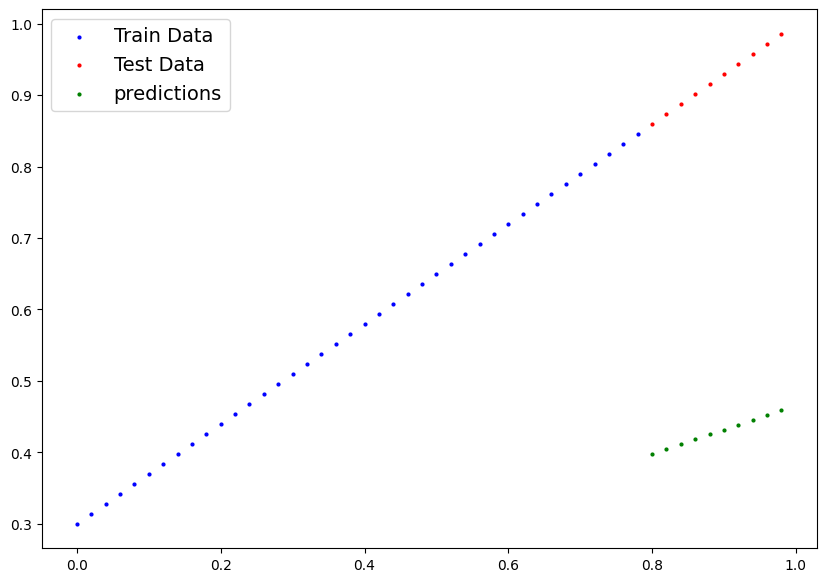

In [22]:
plot_prediction(predictions=y_preds)

We use **inference mode** to ensure pytorch do not track gradients of parameters which it usually does. Since we run prediction on test sets and not
train sets we do not require pytorch to keep note of gradients.

One may also use **torch.no_grad()** instead of **torch.inference_mode()**.

## TRAIN MODEL
Training is done to ensure random parameters gets closer to **known** parameters i.e. make predictions better.

One way to measure how good/bad the model's prediction is we make use of **loss function**.

**optimisers** : Takes into account the loss and adjusts the parameters to reduce the loss subsequently.

For pytorch we need the following:
1. training loop
2. testing loop

In [ ]:
# set up a loss function
loss=nn.L1Loss()

#set up an optimiser
optimiser=torch.optim.SGD(model.parameters(),)